<h2> Task1 </h2>

<h3>Importing Libraries</h3>

In [1]:
import sys
import numpy as np
import pandas as pd
import sklearn
import matplotlib as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

<h3> Import data </h3>

In [2]:
import util_mnist_reader as mnist_reader
p_train, q_train = mnist_reader.load_mnist('/Users/Jyoti/Downloads/data_with_notebook/data/fashion', kind='train')
p_test, q_test = mnist_reader.load_mnist('/Users/Jyoti/Downloads/data_with_notebook/data/fashion', kind='t10k')

<h3>Normalization</h3>

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()
p_train = min_max_scaler.fit_transform(p_train)  
p_test = min_max_scaler.fit_transform(p_test)

<h3>Clustering</h3>

In [4]:
from sklearn.cluster import KMeans
n= (np.max(q_train))+1
kmeans=KMeans(n_clusters=n,random_state=0,algorithm='full',verbose=1,max_iter=5,n_init=10,n_jobs=-1)
kmeans.fit(p_train)
kmeans.labels_
q_pred=kmeans.predict(p_test)

<h3>Accuracy Calculation</h3>

In [5]:
from scipy.stats import mode
from sklearn import metrics
accuracy=(metrics.completeness_score(q_test,q_pred,))
print("Accuracy:"+ str(accuracy))
labels=np.zeros_like(q_pred)
for i in range(10):
   mask=(q_pred==i)      # Matching of learned cluster labels with the true labels
   labels[mask]=mode(q_test[mask])[0]
print(labels)
acc_score=metrics.accuracy_score(q_test,labels)
print("Accuracy:"+ str(acc_score))

Accuracy:0.5188523502154055
[7 4 1 ... 3 1 5]
Accuracy:0.5705


<h2>Task 2 </h2>

<h3> importing datasets</h3>


In [6]:
import util_mnist_reader as mnist_reader
X_train, y_train = mnist_reader.load_mnist('/Users/Jyoti/Downloads/data_with_notebook/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('/Users/Jyoti/Downloads/data_with_notebook/data/fashion', kind='t10k')

<h3>Importing Libraries</h3>

In [7]:
from keras.layers import Dense
from keras.models import Input,Model
import json
from keras import backend as K
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


<h3>Pre-processing of dataset</h3>

In [8]:
X_train = X_train.astype("float32")/255.0
X_test = X_test.astype("float32")/255.0

<h3>Encoding</h3>

In [9]:
input_image = Input(shape=(784,))
encoding = Dense(32, activation="relu")(input_image)
encoding = Dense(16, activation="relu")(encoding)
decoding = Dense(32, activation="relu")(encoding)
output_image = Dense(784, activation="sigmoid")(decoding)
autoencoder_model = Model(input_image, output_image)
autoencoder_model.compile(optimizer="rmsprop", loss="binary_crossentropy",metrics=["accuracy"])


In [10]:
history = autoencoder_model.fit(X_train, X_train, 
                          epochs=10, 
                          batch_size=256, 
                          shuffle=True,
                          validation_data=(X_train, X_train))

Train on 60000 samples, validate on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.3996 - accuracy: 0.4861 - val_loss: 0.3472 - val_accuracy: 0.4946
Epoch 2/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.3332 - accuracy: 0.5004 - val_loss: 0.3296 - val_accuracy: 0.4985
Epoch 3/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.3224 - accuracy: 0.5022 - val_loss: 0.3186 - val_accuracy: 0.5044
Epoch 4/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.3173 - accuracy: 0.5031 - val_loss: 0.3167 - val_accuracy: 0.5015
Epoch 5/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.3137 - accuracy: 0.5037 - val_loss: 0.3126 - val_accuracy: 0.5054
Epoch 6/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.3112 - accuracy: 0.5041 - val_loss: 0.3107 - val_accuracy: 0.5030
Epoch 7/10
60000/60000 [==============================] - 5s 82us/st

In [11]:
restoring_testdata = autoencoder_model.predict(X_test)
encoding = K.function([autoencoder_model.layers[0].input], [autoencoder_model.layers[4].output])
encoding_images = encoding([X_test])[0].reshape(-1,784)
kmeans = KMeans(n_clusters=10)
y_pred = kmeans.fit_predict(encoding_images)
labels=np.zeros_like(y_pred)
for i in range(10):        # ## Matching the learned cluster labels with the true cluster labels
    mask=(y_pred==i)
    labels[mask]=mode(y_test[mask])[0]
print(labels)                                

[9 4 1 ... 6 1 5]


<h3>Confusion Matrix</h3>

In [12]:
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)
print(metrics.completeness_score(y_test,y_pred))

[[ 53  46  18   0   6   1 227 644   5   0]
 [ 10  12 883   0   0   0  31  63   1   0]
 [ 28 641   3   0   6   0 297  19   6   0]
 [ 43  15 476   0   4   0 133 329   0   0]
 [ 31 687  20   0   5   0 110 143   4   0]
 [678   0   0  62   0 202   8   0   0  50]
 [ 79 369  11   0   4   0 304 216  17   0]
 [ 59   0   0 165   0 774   0   0   0   2]
 [ 34  65   2   6 408  34  82   4 364   1]
 [ 23   0   0 579   0  24   4   1   0 369]]
0.543157973637945


<h3>Graphs</h3>

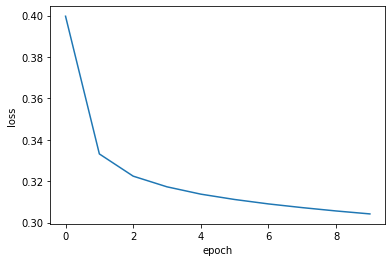

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


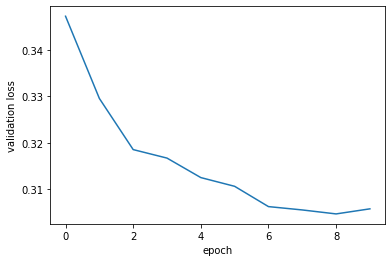

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])
plt.ylabel('validation loss')
plt.xlabel('epoch')
plt.show()


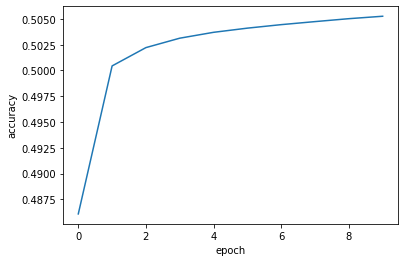

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()


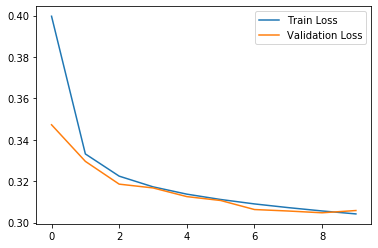

In [16]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

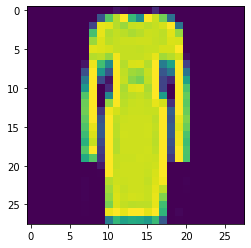

In [17]:
image=X_train[2500,:].reshape((28,28))
plt.imshow(image)
plt.show()

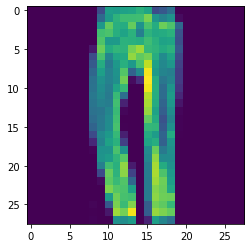

In [18]:
image=X_train[1500,:].reshape((28,28))
plt.imshow(image)
plt.show()

<h2> Task 3</h2>

<h3> Importing Libraries</h3>

In [19]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras.datasets import mnist
import util_mnist_reader as mnist_reader

<h3> Importing dataset</h3>

In [20]:
j_train, k_train = mnist_reader.load_mnist('/Users/Jyoti/Downloads/data_with_notebook/data/fashion', kind='train')
j_test, k_test = mnist_reader.load_mnist('/Users/Jyoti/Downloads/data_with_notebook/data/fashion', kind='t10k')
j_train=j_train/255
j_test=j_test/255
j_train = j_train.reshape((len(j_train),np.prod(j_train.shape[1:])))
j_test = j_test.reshape((len(j_test),np.prod(j_test.shape[1:])))

<h3>Encoding</h3>

In [21]:
encoding_dimension = 6
input_image = Input(shape=(784,))
decording = Dense(256, activation = 'selu')(input_image)
decording= Dense(128,activation='selu')(decording)

encoding= Dense(encoding_dimension, activation='selu',kernel_regularizer = regularizers.l2(0.01))(decording)
decording=Dense(128,activation='selu')(encoding)
decording=Dense(256,activation='selu')(decording)
decording=Dense(784,activation='sigmoid')(decording)
autoencoder_gaussian_model=Model(input_image,decording)
encoding = Model(input_image, encoding)
encoding_input = Input(shape=(encoding_dimension,))
decording = autoencoder_gaussian_model.layers[-3](encoding_input)
decording = autoencoder_gaussian_model.layers[-2](decording)
decording = autoencoder_gaussian_model.layers[-1](decording)

<h3>Training the model</h3>

In [22]:
from sklearn import mixture
decoder=Model(encoding_input,decording)
autoencoder_gaussian_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
autoencoder_gaussian_model.fit(j_train, j_train, epochs=20, batch_size=2056,shuffle=True,validation_data=(j_test,j_test))
encoded_image=autoencoder_gaussian_model.predict(j_test)
clf = mixture.GaussianMixture(n_components=10)
k_pred = clf.fit_predict(encoded_image)
labels=np.zeros_like(k_pred)
for i in range(10):   ## Matching the learned cluster labels with the true cluster labels
    mask=(k_pred==i)
    labels[mask]=mode(k_test[mask])[0]
print(labels)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.6045 - accuracy: 0.4545 - val_loss: 0.4754 - val_accuracy: 0.4907
Epoch 2/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.4430 - accuracy: 0.4939 - val_loss: 0.4216 - val_accuracy: 0.4936
Epoch 3/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.4062 - accuracy: 0.4948 - val_loss: 0.3945 - val_accuracy: 0.4912
Epoch 4/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.3823 - accuracy: 0.4964 - val_loss: 0.3736 - val_accuracy: 0.4963
Epoch 5/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.3656 - accuracy: 0.4978 - val_loss: 0.3610 - val_accuracy: 0.4961
Epoch 6/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.3557 - accuracy: 0.4982 - val_loss: 0.3535 - val_accuracy: 0.4973
Epoch 7/20
60000/60000 [==============================] - 7s 1

<h3>Confusion Matrix</h3>

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix_guassian = confusion_matrix(k_test,k_pred)
print(confusion_matrix_guassian)
print(metrics.completeness_score(k_test,k_pred))*100

[[ 20   6   4   1 750  63   0   0 125  31]
 [884   0   0   0   9  14   0   0  81  12]
 [  2  18   4   0  15 234   0   0  66 661]
 [446   7   1   0  32  22   0   0 477  15]
 [ 16  12   5   0   0  91   0   0 219 657]
 [  0   0   0 551   0 230 156  63   0   0]
 [  9   9  12   2 202 231   0   0 150 385]
 [  0   0   1 793   0   0 203   3   0   0]
 [  3 428 360  40   3  77  21   1  15  52]
 [  0   3   0  15   0  15 516 447   4   0]]
0.5601528678637965


<h3>Graph</h3>

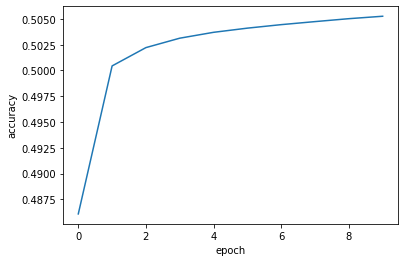

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

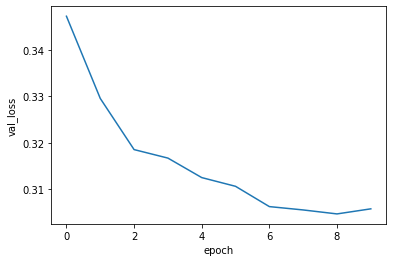

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

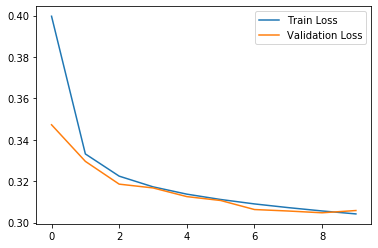

In [26]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()